# This is the Github Link https://github.com/FaresQaddoumi/ML-fundamentals-2025

In [3]:
# Import necessary libraries
import pandas as pd

# Load the Bike Sharing dataset (hour data)
df = pd.read_csv('C:/Users/er/Downloads/hour.csv')

df.info()
# Display the first 5 rows of the dataset
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Loaded the dataset `hour.csv`**  
We used `pandas` to load the UCI Bike Sharing dataset, which includes hourly records of bike rentals and related features like time, weather, and user types.  
We also displayed dataset info and the first few rows to understand its structure and check for missing values.


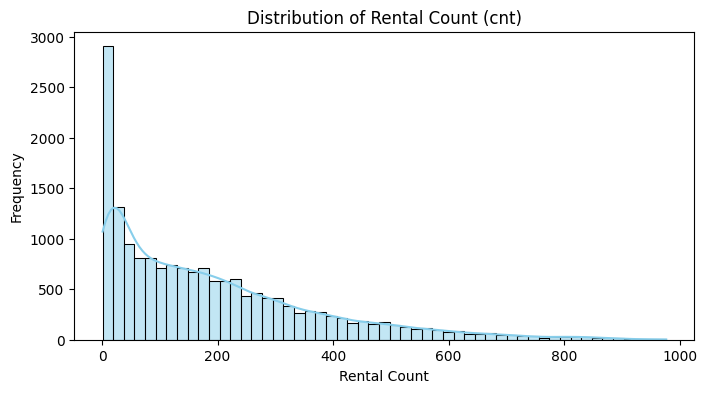

Skewness of cnt: 1.28


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

plt.figure(figsize=(8, 4))
sns.histplot(df['cnt'], kde=True, color='skyblue')
plt.title('Distribution of Rental Count (cnt)')
plt.xlabel('Rental Count')
plt.ylabel('Frequency')
plt.show()

cnt_skewness = skew(df['cnt'])
print(f'Skewness of cnt: {cnt_skewness:.2f}')


 **Explored the distribution of the target variable `cnt`**  
A histogram with a kernel density estimate was plotted to visualize the distribution (smoother distribution for large data).  
We also computed the skewness to measure asymmetry:
- A positive skew means more frequent lower values with a long tail of higher values.
- A negative skew means the opposite of a positive skew.

The distribution here is slightly positively skewed.


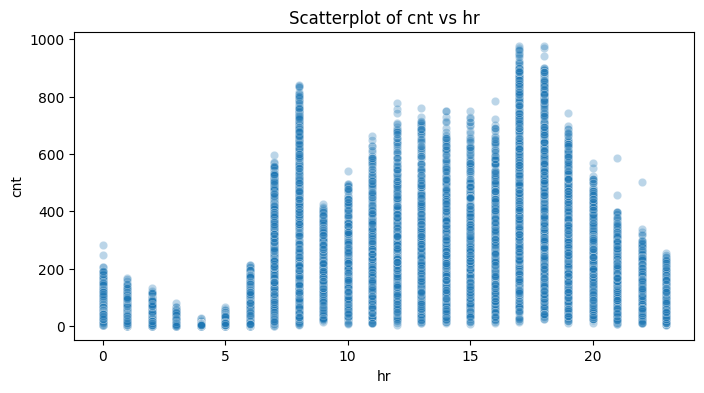

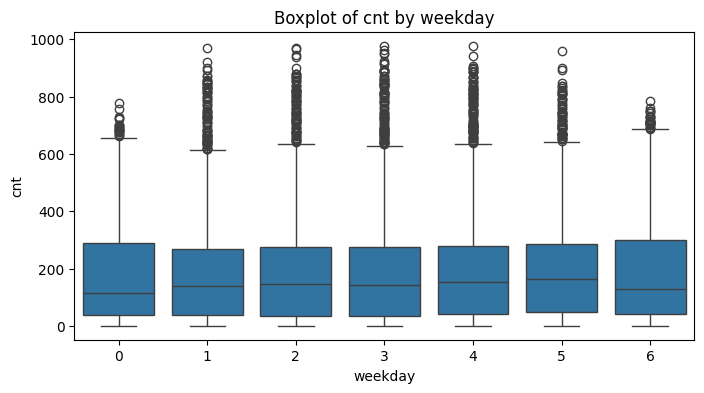

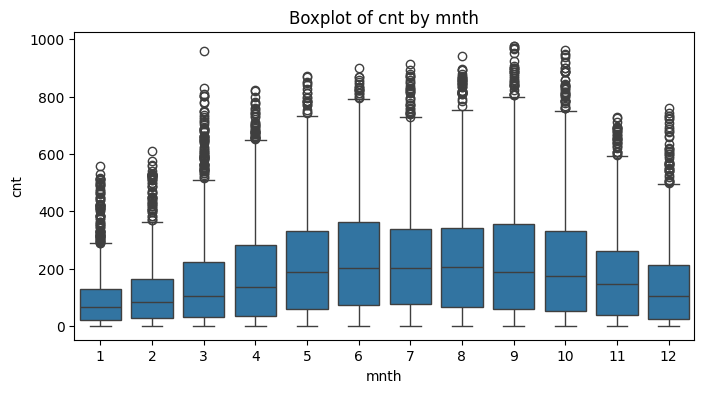

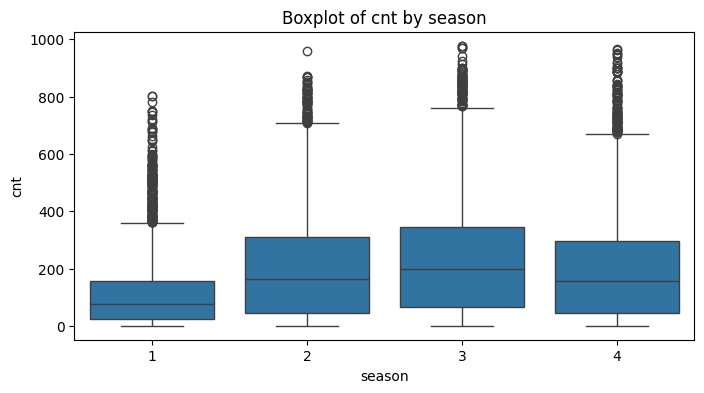

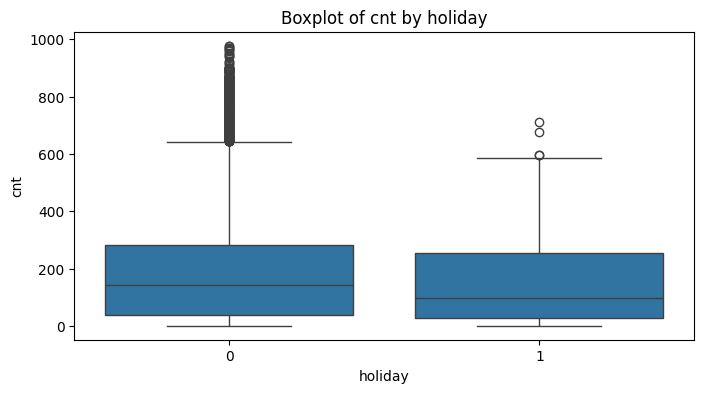

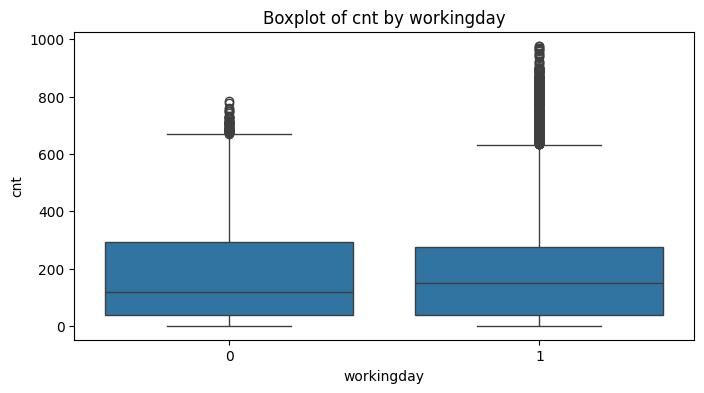

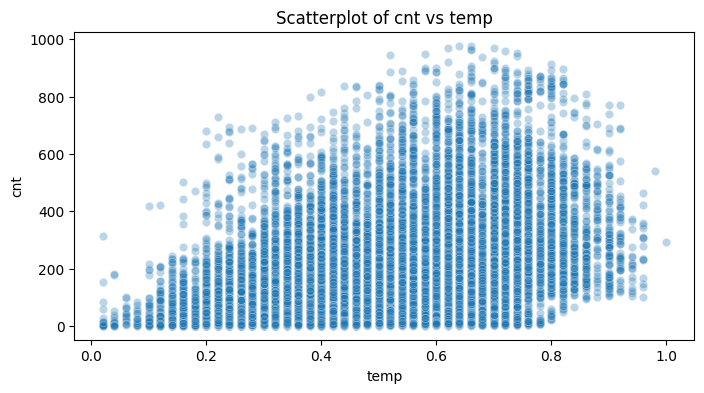

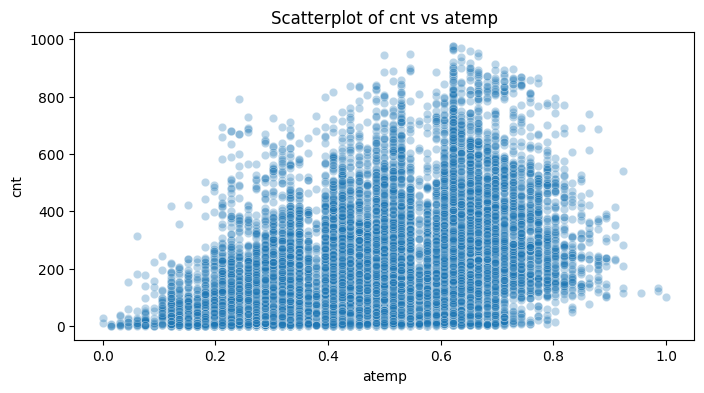

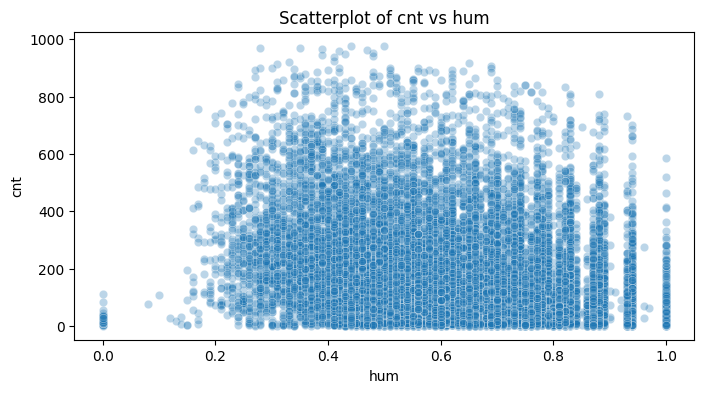

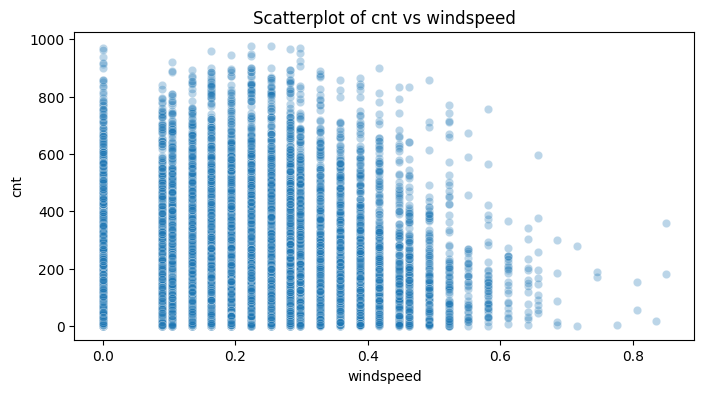

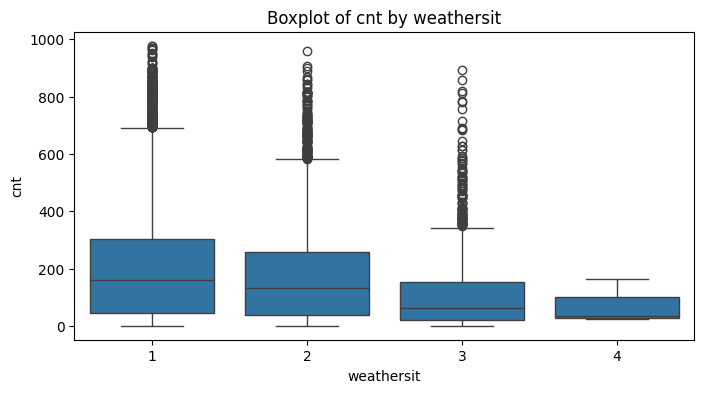

In [8]:
for feature in temporal_features + binary_features + weather_features:
    plt.figure(figsize=(8, 4))
    if df[feature].nunique() < 20:
        sns.boxplot(data=df, x=feature, y='cnt')  # Removed palette
        plt.title(f'Boxplot of cnt by {feature}')
    else:
        sns.scatterplot(data=df, x=feature, y='cnt', alpha=0.3)
        plt.title(f'Scatterplot of cnt vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('cnt')
    plt.show()



**Explored feature influence on `cnt`**
- cnt: Total count of bike rentals in an hour
We analyzed how various feature categories impact the rental count:
- **Temporal features** (hour, day, month, season)
- - People rent more bikes during morning (commute to work) and evening hours (commute home)
- **Binary features** (holiday, working day)
- **Weather features** (temperature, humidity, windspeed, etc.)

We used boxplots for categorical features and scatter plots for continuous ones to understand relationships and patterns.


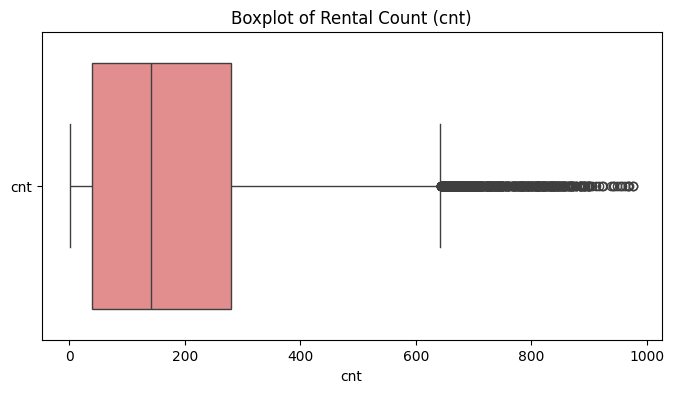

In [9]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['cnt']], orient='h', color='lightcoral')
plt.title('Boxplot of Rental Count (cnt)')
plt.xlabel('cnt')
plt.show()


**Potential Outliers in 'cnt'**
- This boxplot identifies extreme rental values that might be outliers, which could affect model performance.


In [10]:
df_cleaned = df.drop(columns=['instant', 'dteday', 'casual', 'registered'])
df_cleaned.shape


(17379, 13)

**Cleaning/Removing irrelevant or harmful columns**

-instant is a row id that doesn't add predictive value,dteday since we already parsed data features like math and weather, casual and registeres are component of target cnt, so including them wouls leak information to the model.